# Decision Tree
## 21BCE1010 
## CHANAKYA BHARDWAJ MUDUNURU

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib


data = pd.read_csv("music.csv") # 1 is male 0 is female
data

age  gender      genre
0    20       1     HipHop
1    23       1     HipHop
2    25       1     HipHop
3    26       1       Jazz
4    29       1       Jazz
5    30       1       Jazz
6    31       1  Classical
7    33       1  Classical
8    37       1  Classical
9    20       0      Dance
10   21       0      Dance
11   25       0      Dance
12   26       0   Acoustic
13   27       0   Acoustic
14   30       0   Acoustic
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical

In [ ]:
dropdata=data.drop(columns=['genre'])
dropdata

age  gender
0    20       1
1    23       1
2    25       1
3    26       1
4    29       1
5    30       1
6    31       1
7    33       1
8    37       1
9    20       0
10   21       0
11   25       0
12   26       0
13   27       0
14   30       0
15   31       0
16   34       0
17   35       0

In [ ]:
genre=data['genre']
genre

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [ ]:
model = dt()
model.fit(dropdata,genre)

DecisionTreeClassifier()

[Text(0.625, 0.875, 'x[0] <= 30.5\ngini = 0.755\nsamples = 14\nvalue = [3, 5, 2, 1, 3]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\ngini = 0.716\nsamples = 9\nvalue = [3, 0, 2, 1, 3]'),
 Text(0.25, 0.375, 'x[0] <= 23.5\ngini = 0.48\nsamples = 5\nvalue = [3, 0, 2, 0, 0]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]'),
 Text(0.75, 0.375, 'x[0] <= 24.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 0, 1, 3]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0, 0, 0]')]

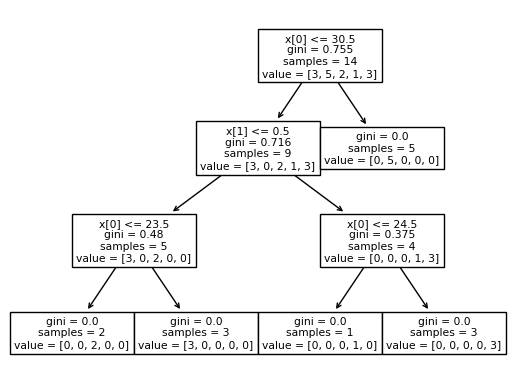

In [ ]:
from sklearn import tree
tree.plot_tree(model)

In [ ]:
predictions= model.predict([[21,1], [24,0]])
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Dance'], dtype=object)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(dropdata, genre, test_size=0.2)

model.fit(x_train,y_train)

predictions2=model.predict(x_test)

acc=accuracy_score(y_test, predictions2)

acc

0.5

In [ ]:


'''persistant means saving already trained model to a file so that need not train again'''


joblib.dump(model, "music-recommender.joblib")

['music-recommender.joblib']

In [ ]:


model2=joblib.load('music-recommender.joblib')
predictions=model2.predict([[21,1]])
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop'], dtype=object)

In [ ]:
from sklearn import tree
tree.export_graphviz(model2,out_file='music-recommender.dot',
                     feature_names=['age','gender'],
                     class_names=sorted(genre.unique()),
                     label = 'all', #all boxes are labelled
                     rounded = True, #boxes are rounded
                     filled = True) # box is filled with colour